In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import*
from keras.models import*
from keras.preprocessing import image

In [ ]:
TRAIN_PATH='CovidDataset/Train'
VAL_PATH='CovidDataset/Test'

In [ ]:
#CNN based model in Keras

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [ ]:
#Train from scratch
train_datagen=image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
test_dataset=image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 224 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validator_generator=test_dataset.flow_from_directory(
    'CovidDataset/Test',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 60 images belonging to 2 classes.


In [ ]:
hist=model.fit(
    train_generator,
    steps_per_epoch=7,
    epochs= 10,
    validation_data=validator_generator,
    validation_steps=2
)

Epoch 1/10
7/7 [==============================] - 45s 6s/step - loss: 1.2065 - accuracy: 0.5670 - val_loss: 0.6845 - val_accuracy: 0.8000
Epoch 2/10
7/7 [==============================] - 31s 4s/step - loss: 0.6312 - accuracy: 0.6875 - val_loss: 0.6244 - val_accuracy: 0.8667
Epoch 3/10
7/7 [==============================] - 27s 4s/step - loss: 0.4931 - accuracy: 0.7857 - val_loss: 0.4193 - val_accuracy: 0.8667
Epoch 4/10
7/7 [==============================] - 28s 4s/step - loss: 0.4139 - accuracy: 0.8304 - val_loss: 0.3127 - val_accuracy: 0.9333
Epoch 5/10
7/7 [==============================] - 28s 4s/step - loss: 0.3064 - accuracy: 0.8795 - val_loss: 0.2328 - val_accuracy: 0.9167
Epoch 6/10
7/7 [==============================] - 29s 4s/step - loss: 0.2424 - accuracy: 0.9107 - val_loss: 0.1413 - val_accuracy: 0.9500
Epoch 7/10
7/7 [==============================] - 30s 4s/step - loss: 0.1936 - accuracy: 0.9152 - val_loss: 0.1587 - val_accuracy: 0.9500
Epoch 8/10
7/7 [==================

In [ ]:
model.save("test_1.h5")

In [ ]:
model.evaluate(train_generator)

7/7 [==============================] - 12s 2s/step - loss: 0.1236 - accuracy: 0.9777


[0.1236407607793808, 0.9776785969734192]

In [ ]:
model.evaluate(validator_generator)

2/2 [==============================] - 3s 1s/step - loss: 0.0916 - accuracy: 0.9833


[0.0915818065404892, 0.9833333492279053]

In [ ]:
model = load_model('test_1.h5')
import os

In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
y_actual = []
y_test = []

In [ ]:
for i in os.listdir("./CovidDataset/Test/Normal/"):
    img = tf.keras.preprocessing.image.load_img("./CovidDataset/Test/Normal/"+i,target_size=(224,224))
    img = tf.keras.utils.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    p = (model.predict(img) > 0.5).astype("int32")
    y_test.append(p[0,0])
    y_actual.append(1)




In [ ]:
for i in os.listdir("./CovidDataset/Test/Covid/"):
    img = tf.keras.preprocessing.image.load_img("./CovidDataset/Test/Covid/"+i,target_size=(224,224))
    img = tf.keras.utils.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    p = (model.predict(img) > 0.5).astype("int32")
    y_test.append(p[0,0])
    y_actual.append(0)

In [ ]:
y_actual = np.array(y_actual)
y_test=np.array(y_test)


[[26  4]
 [ 0 30]]


<AxesSubplot:>

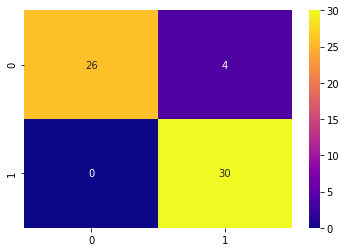

In [ ]:

from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_actual, y_test)
print(confusion_mat)
cm = confusion_matrix(y_actual, y_test)
import seaborn

seaborn.heatmap(cm,cmap="plasma",annot=True)

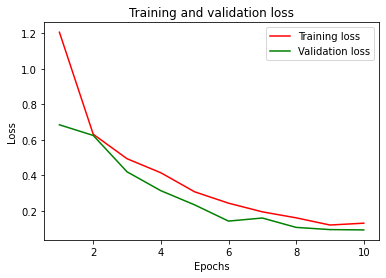

In [ ]:
import matplotlib.pyplot as plt
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

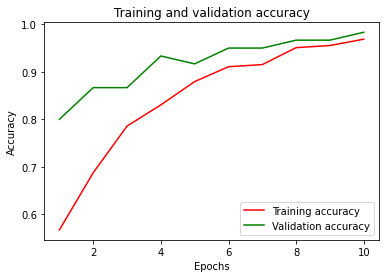

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training accuracy')
plt.plot(epochs, val_acc, color='green', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

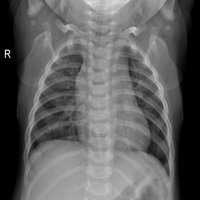

Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


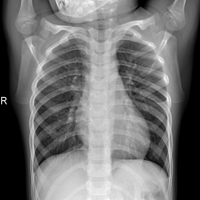

Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


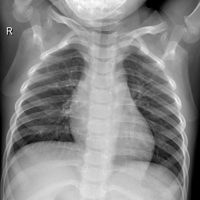

Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


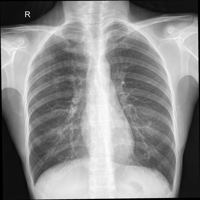

Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


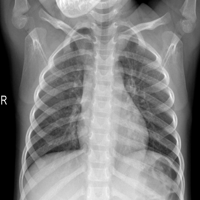

Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


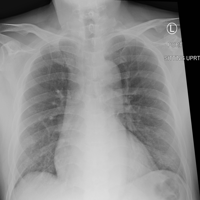

Radiologist: COVID-19 +ve
Radiologist: COVID-19 -ve


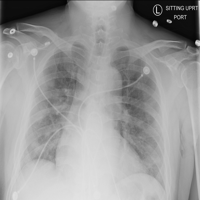

Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


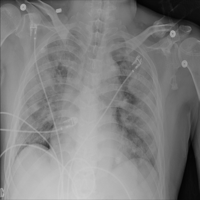

Radiologist: COVID-19 +ve
Radiologist: COVID-19 -ve


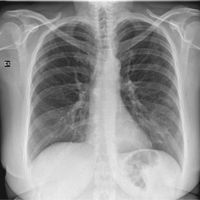

Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


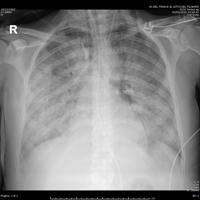

Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


In [ ]:
class color:
   GREEN = '\033[92m'
   RED = '\033[91m'
   
from PIL import Image
j = 0
for i in os.listdir("./CovidDataset/Test/Normal/"):
  j = j+1
  pil_img = Image.open('./CovidDataset/Test/Normal/'+i)
  im = pil_img
  size = (200,200) #image size
  
  #resize image
  out = im.resize(size)
  display(out)
  img = image.load_img("./CovidDataset/Test/Normal/"+i, target_size = (224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict(img)
  print(color.GREEN + 'Radiologist: COVID-19 -ve' + color.GREEN)

  if p==0:
    print(color.RED + 'CNN Model: COVID-19 +ve' + color.RED)
  else:
    print("CNN Model: COVID-19 -ve")
  if (j==5):
    break

from PIL import Image
j = 0
for i in os.listdir("./CovidDataset/Test/Covid/"):
  j = j+1
  pil_img = Image.open('./CovidDataset/Test/Covid/'+i)
  im = pil_img
  size = (200,200) #image size
  
  #resize image
  out = im.resize(size)
  display(out)
  img = image.load_img("./CovidDataset/Test/Covid/"+i, target_size = (224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict(img)
  print(color.RED + 'Radiologist: COVID-19 +ve' + color.RED)
  if p==0:
    print("CNN Model: COVID-19 +ve")
  else:
    print(color.GREEN + 'CNN Model: COVID-19 -ve' + color.GREEN)
  if (j==5):
    break